In [2]:
!pip install -q scikit-learn-intelex imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
!pip install -q opendatasets
import opendatasets as od
link = 'https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data'
od.download(link)

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 245MB/s]


In [3]:
# load dataset
data = pd.read_csv('creditcardfraud/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, data was not  provided with the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [ ]:
# display data information and statistics
data.describe()


Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
# Check for missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


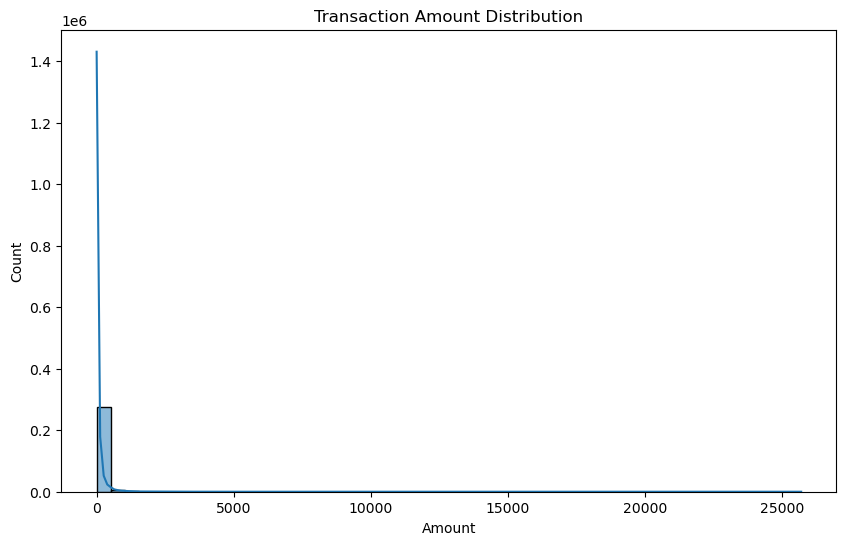

C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


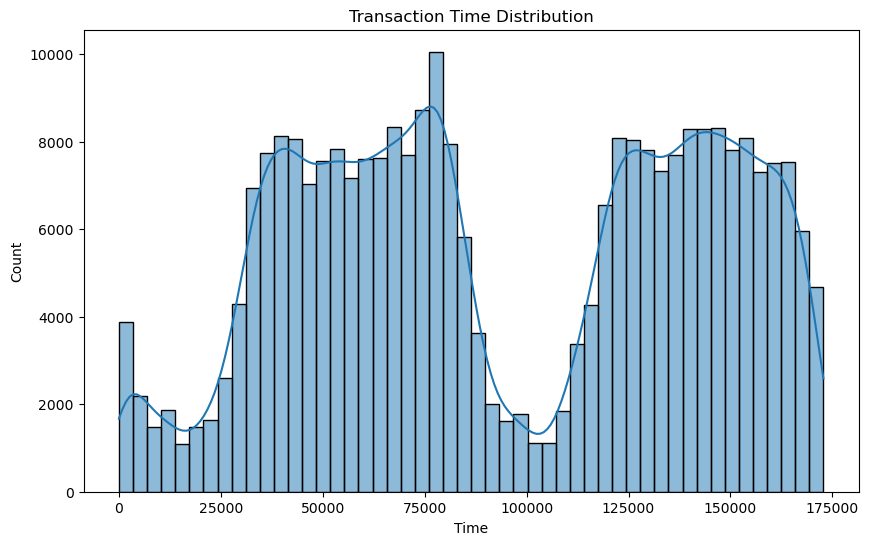

In [ ]:


# Histogram of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Histogram of transaction time
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()


C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


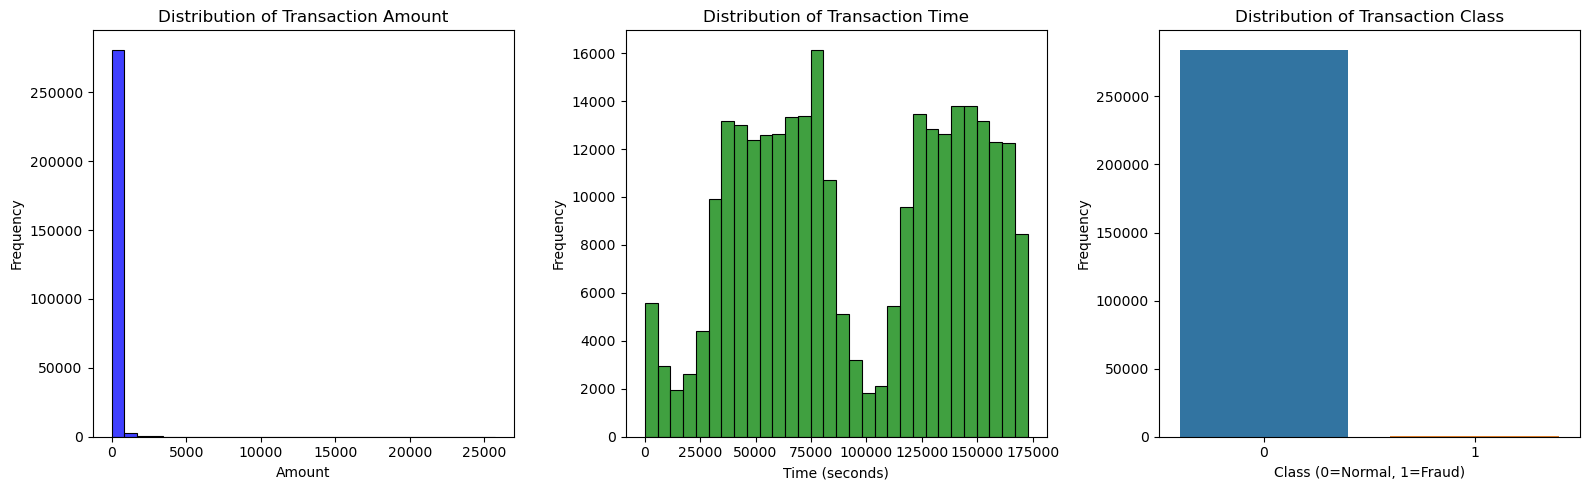

In [ ]:

plt.figure(figsize=(16, 5))

# Plot distribution of 'Amount'
plt.subplot(1, 3, 1)
sns.histplot(data['Amount'], bins=30, kde=False, color='blue')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Plot distribution of 'Time'
plt.subplot(1, 3, 2)
sns.histplot(data['Time'], bins=30, kde=False, color='green')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')

# Plot distribution of 'Class'
plt.subplot(1, 3, 3)
sns.countplot(x='Class', data=data)
plt.title('Distribution of Transaction Class')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

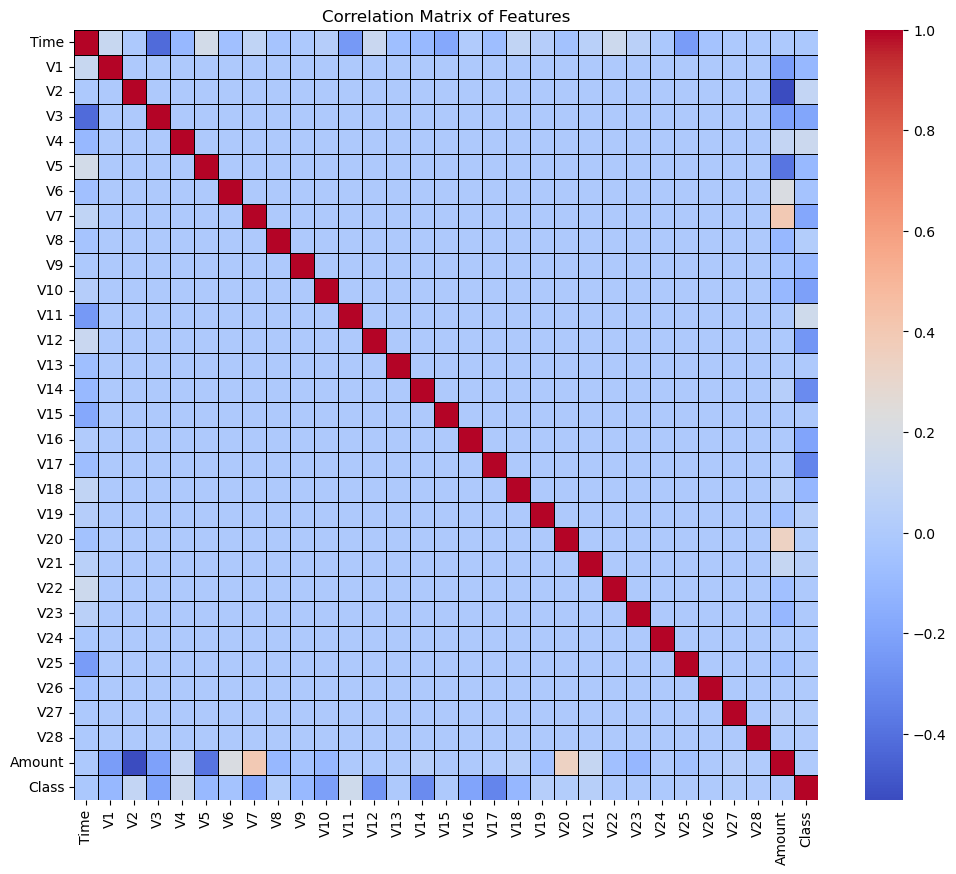

In [ ]:
# correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Features')
plt.show()


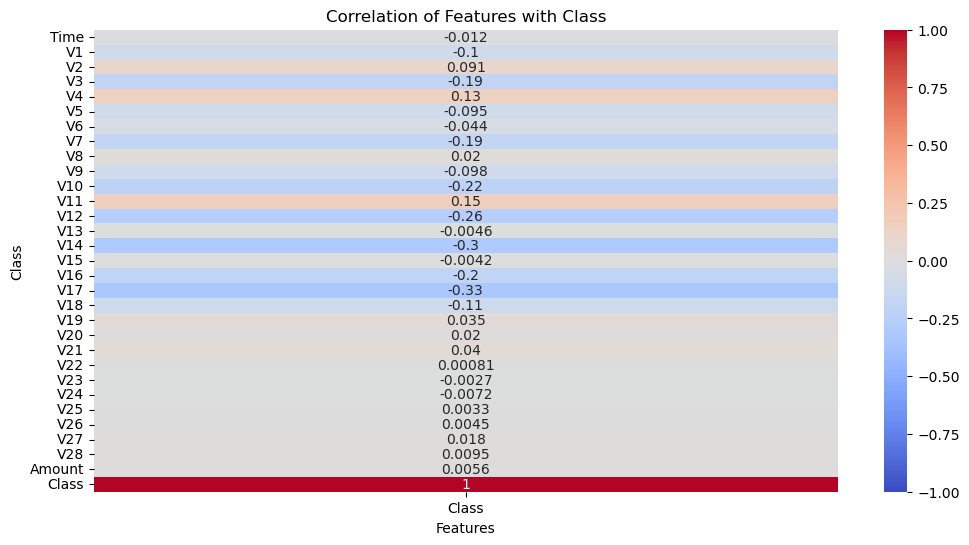

In [ ]:
correlation_matrix = data.corr()

# focus on the correlation with the target variable 'Class'
class_correlation = correlation_matrix[['Class']]

plt.figure(figsize=(12, 6))
sns.heatmap(class_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation of Features with Class')
plt.xlabel('Features')
plt.ylabel('Class')
plt.show()

C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

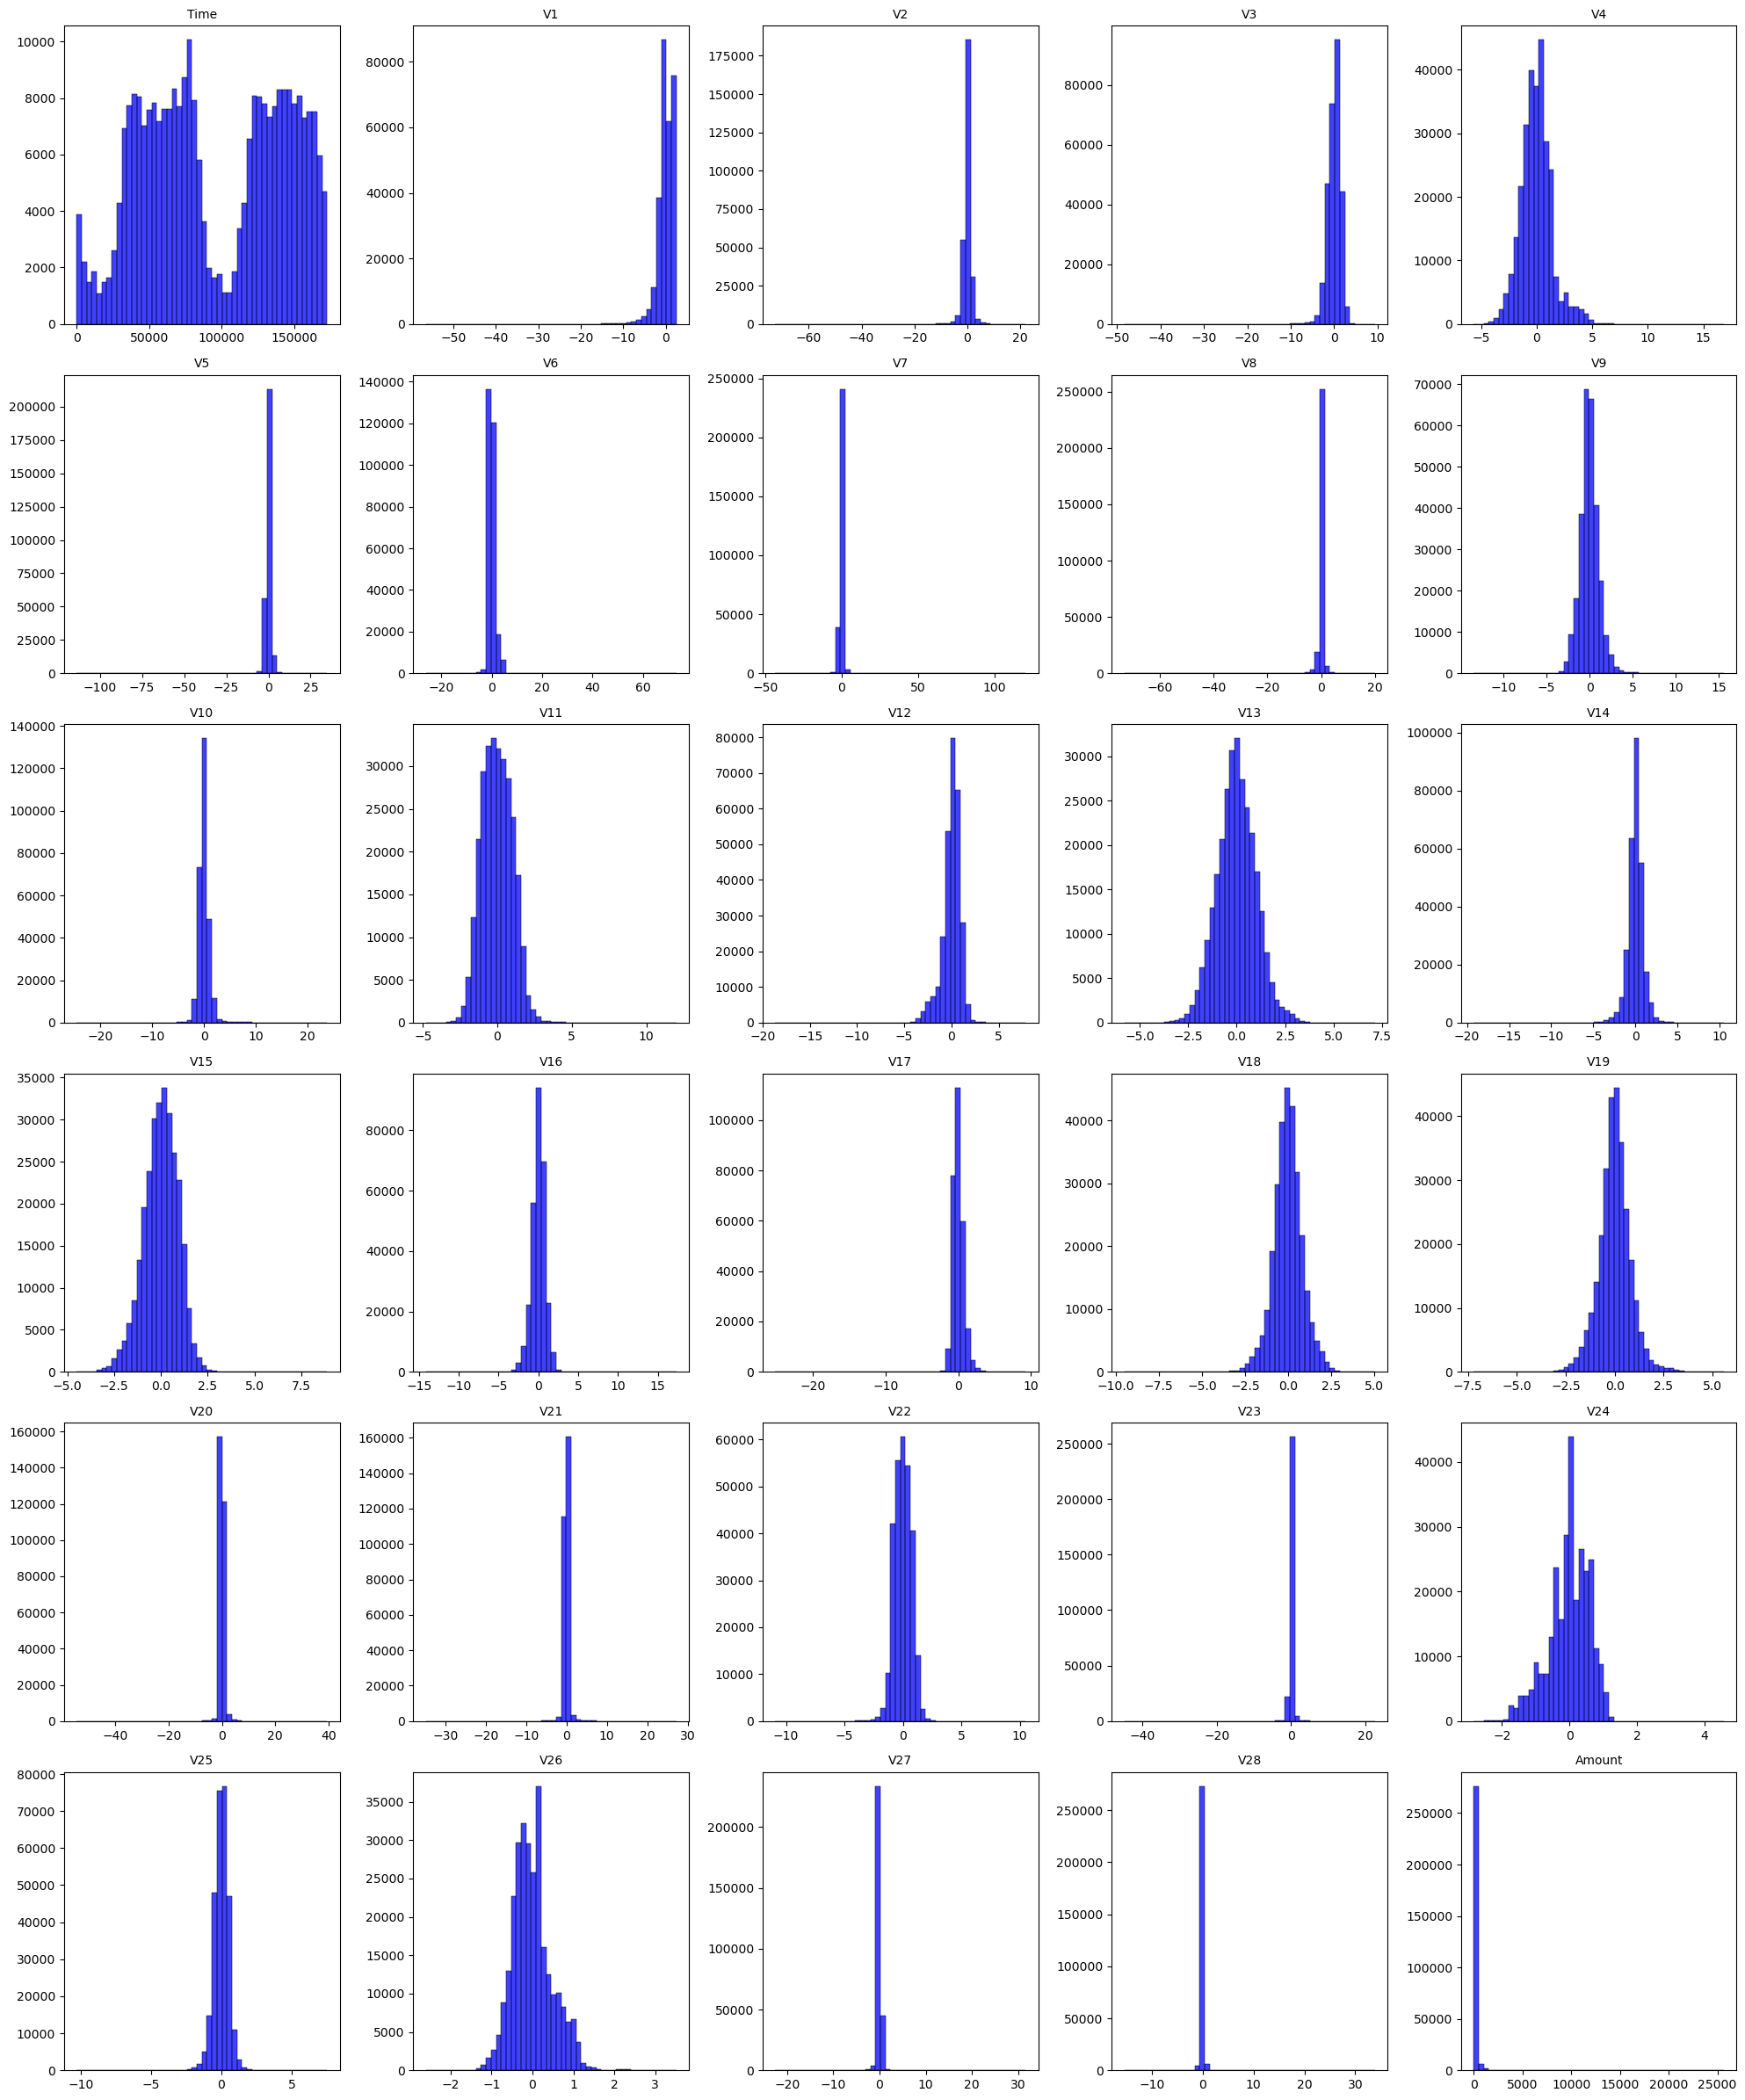

In [ ]:
# Number of rows and columns in the subplot
num_rows = 6
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 24))

# Flatten the axis array.
ax = ax.flatten()

for i, col in enumerate(data.columns[:-1]): # exclude 'Class' from this plot
    sns.histplot(data[col], bins=50, ax=ax[i], kde=False, color='blue')
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove empty subplots
for i in range(len(data.columns)-1, num_rows*num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

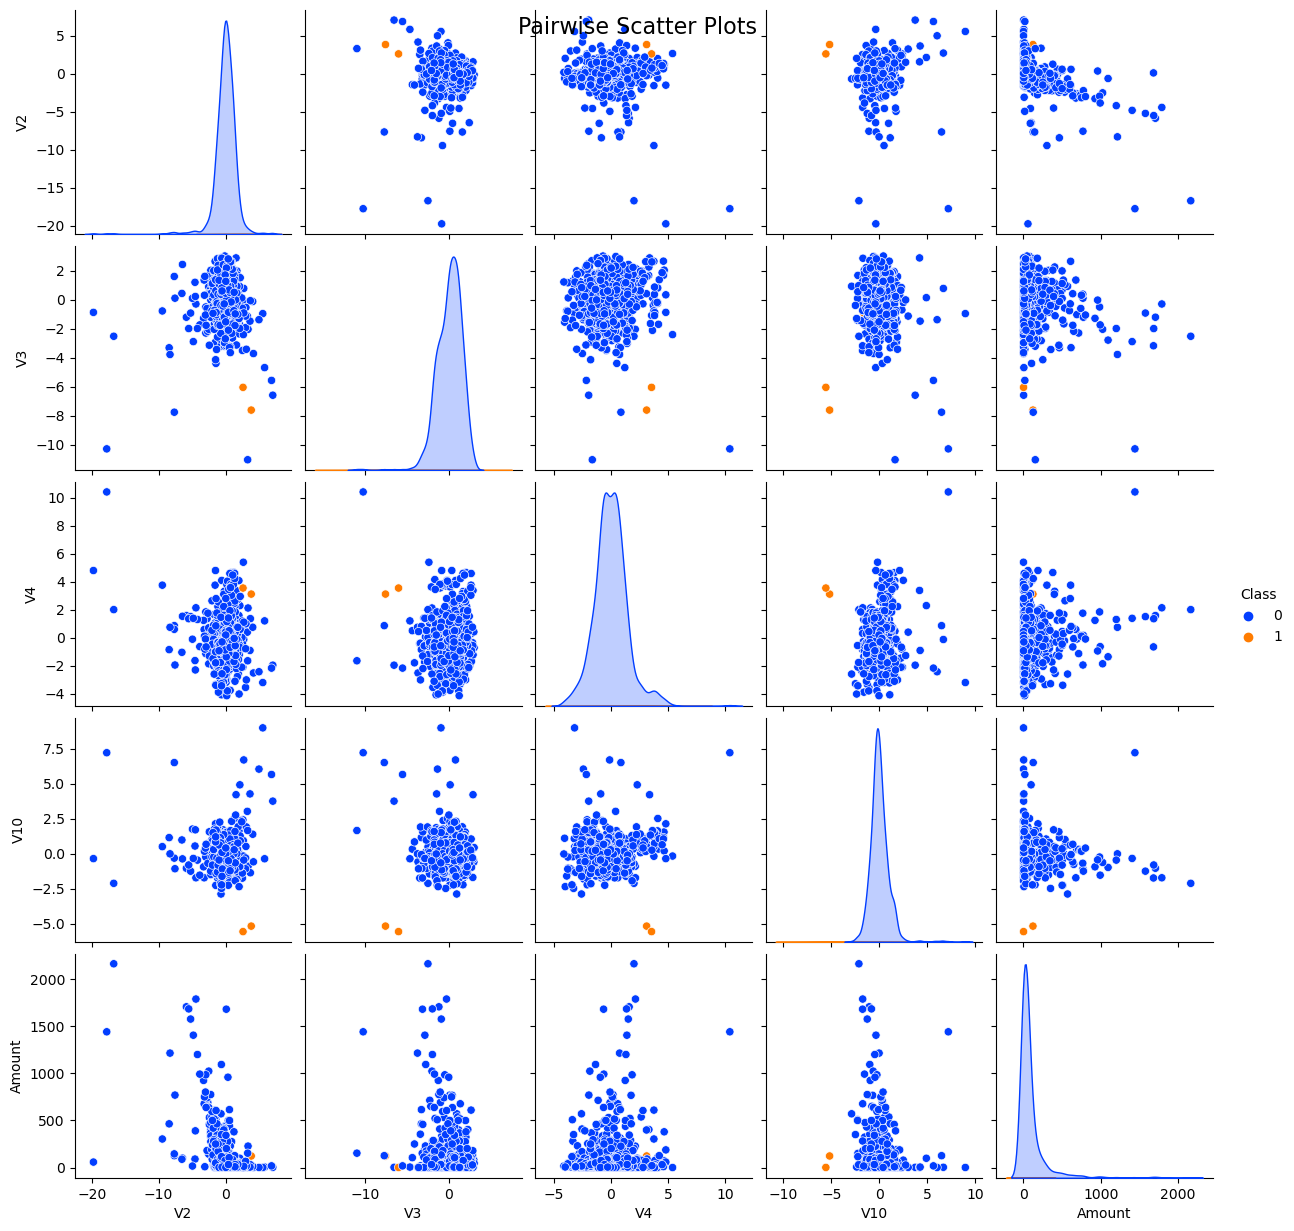

In [ ]:
# Filter data to reduce plot density
sampled_data = data.sample(n=1000, random_state=1)

# Select features based on interesting patterns or correlations
features_to_plot = ['V2', 'V3', 'V4', 'V10', 'Amount']

sns.pairplot(sampled_data, vars=features_to_plot, hue='Class', palette='bright')
plt.suptitle('Pairwise Scatter Plots', size=16)
plt.show()


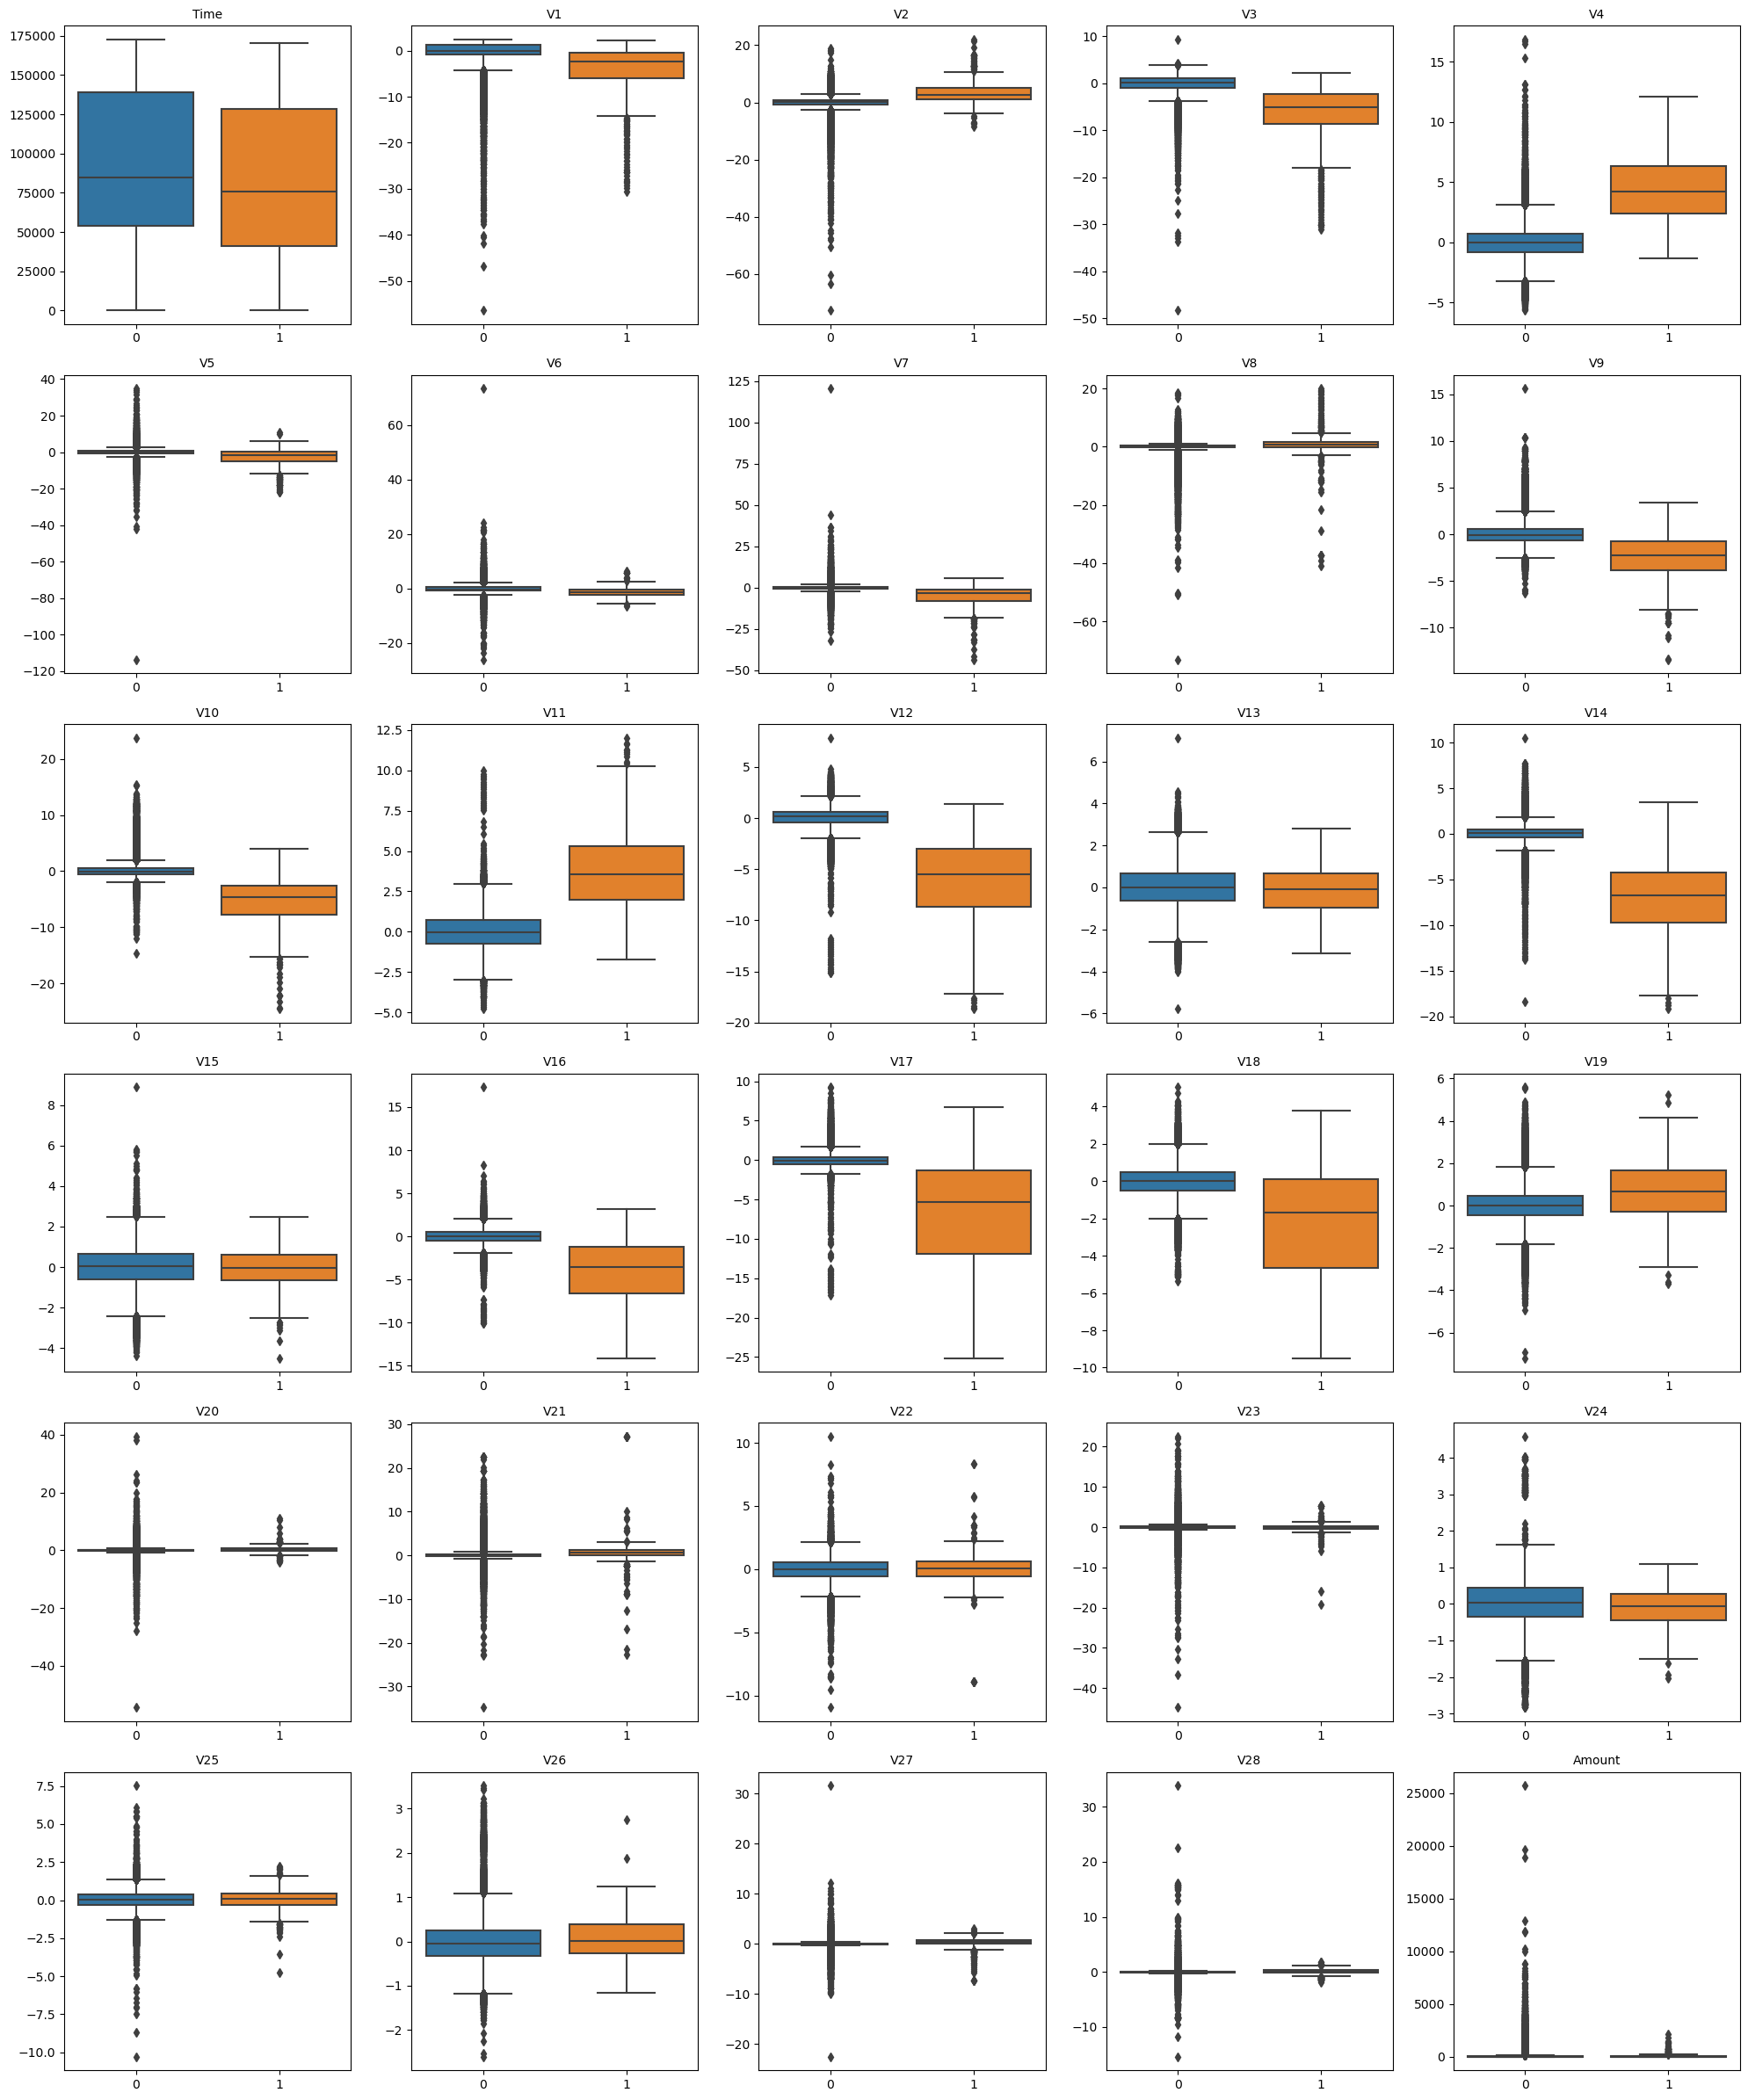

In [ ]:

# Number of rows and columns in the subplot
num_rows = 6
num_cols = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 24))

# Flatten the axis array.
ax = ax.flatten()

for i, col in enumerate(data.columns[:-1]): # Exclude 'Class'
    sns.boxplot(x='Class', y=col, data=data, ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove empty subplots
for i in range(len(data.columns)-1, num_rows*num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


C:\Users\Rehan\AppData\Local\Temp\ipykernel_8988\3594915645.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 0][feature], label='Normal', shade=True, ax=axes[i])
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\AppData\Local\Temp\ipykernel_8988\3594915645.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Class'] == 1][feature], label='Fraud', shade=True, ax=axes[i])
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na optio

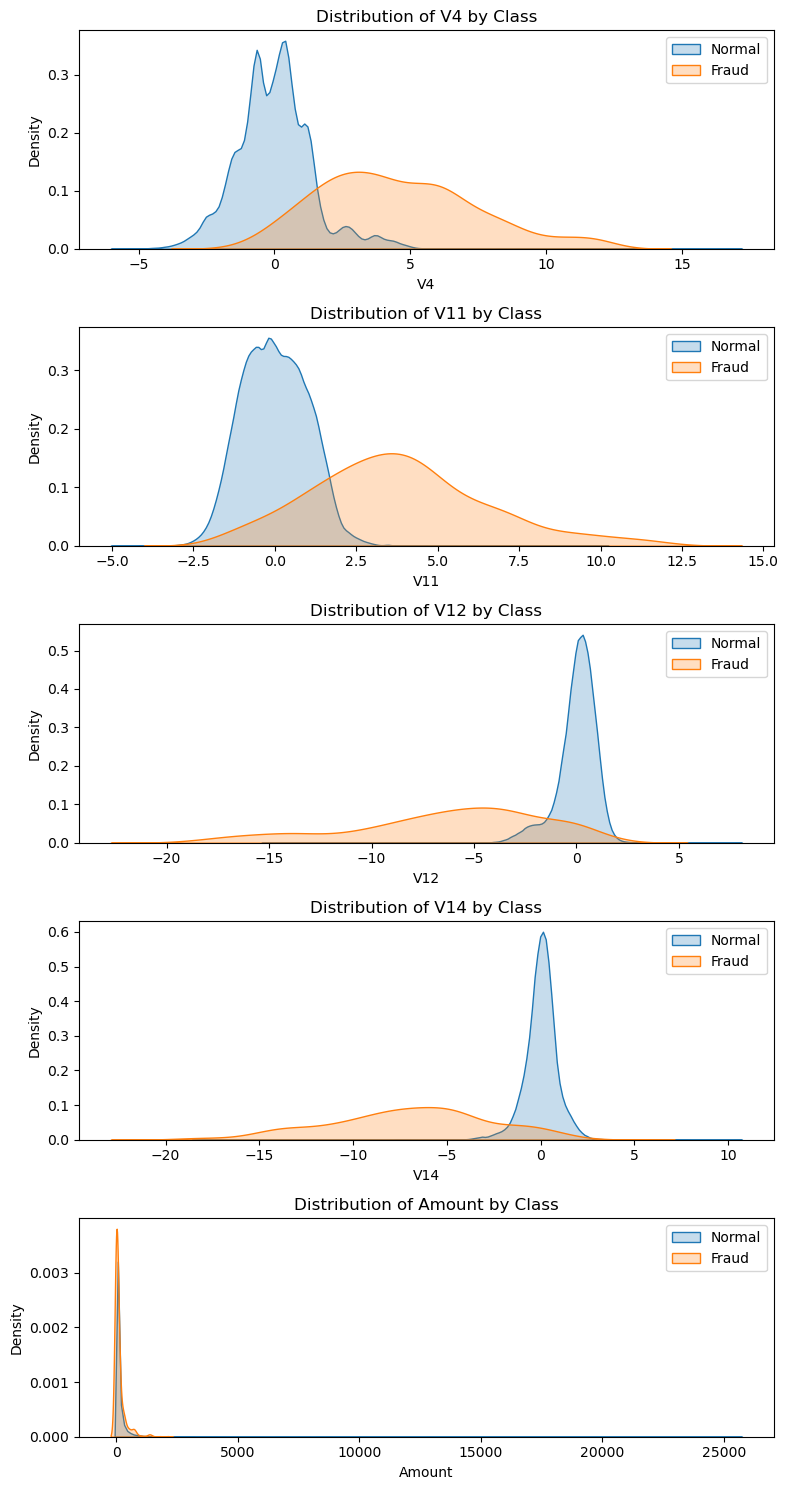

In [ ]:
# Plot kernel density estimation plots for some selected features
selected_features = ['V4', 'V11', 'V12', 'V14', 'Amount']
num_plots = len(selected_features)
fig, axes = plt.subplots(nrows=num_plots, figsize=(8, num_plots*3))

for i, feature in enumerate(selected_features):
    sns.kdeplot(data=data[data['Class'] == 0][feature], label='Normal', shade=True, ax=axes[i])
    sns.kdeplot(data=data[data['Class'] == 1][feature], label='Fraud', shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')
    axes[i].legend()

plt.tight_layout()
plt.show()


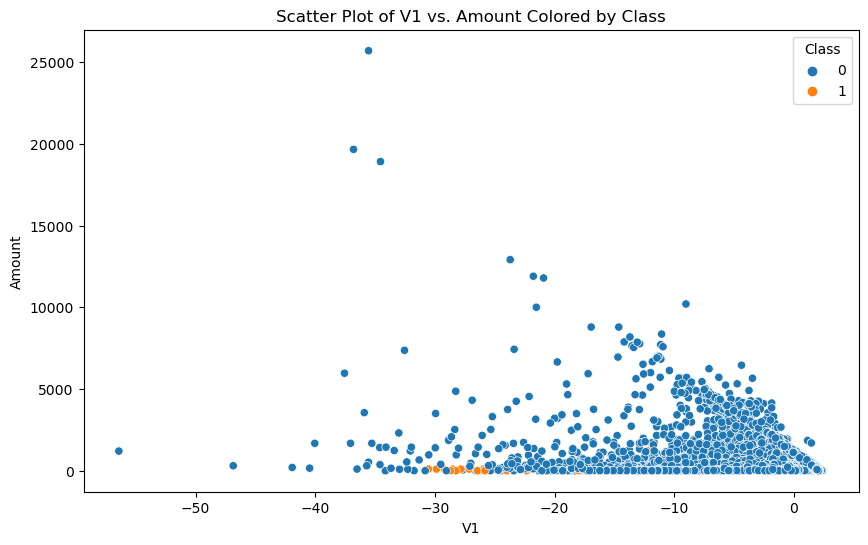

C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rehan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

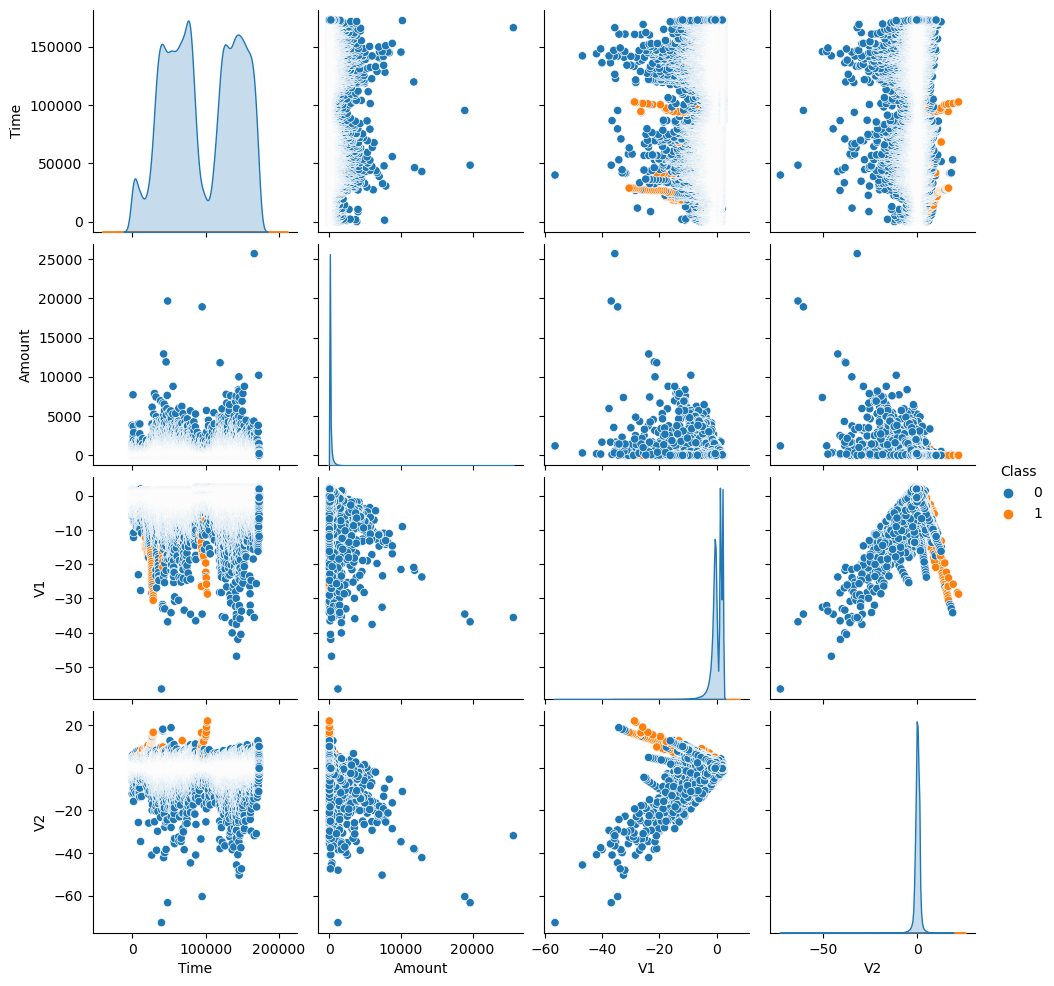

In [ ]:
# Scatter plot for selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='Amount', hue='Class', data=data)
plt.title('Scatter Plot of V1 vs. Amount Colored by Class')
plt.show()

# Pair plot of selected features
sns.pairplot(data[['Time', 'Amount', 'V1', 'V2', 'Class']], hue='Class')
plt.show()


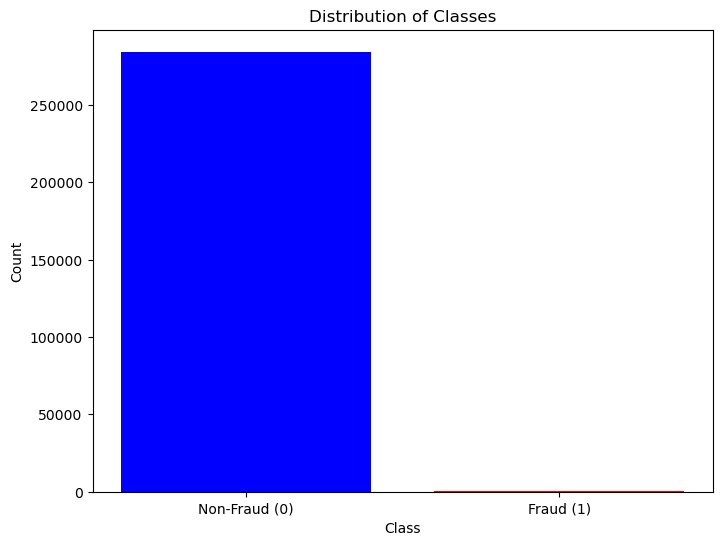

In [ ]:

# Count the occurrences of each class
class_counts = data['Class'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


In [ ]:

class_counts = data['Class'].value_counts()

# Display the counts
print("Frequency of each class in the 'Class' attribute:")
print(class_counts)


Frequency of each class in the 'Class' attribute:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


# Handle Outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
# Initialize the RobustScaler
scaler = RobustScaler()

# Selecting numerical features which are not 'Class'
features = data.columns[:-1]

# Apply RobustScaler to all numerical features
data_scaled = data.copy()
data_scaled[features] = scaler.fit_transform(data[features])

# Optionally, check the scaled data
print(data_scaled.head())


       Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -0.616237 -0.098602  1.228905  0.878152 -0.217859  0.631245   
1 -0.994983  0.524929  0.143100 -0.006970  0.293974  0.087726  0.164395   
2 -0.994972 -0.615587 -1.002407  0.830932  0.251024 -0.344345  1.778007   
3 -0.994972 -0.440239 -0.178789  0.841250 -0.529808  0.033775  1.303832   
4 -0.994960 -0.526089  0.579239  0.713861  0.265632 -0.270695  0.317183   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.177406  0.142432  0.334787  ...  0.026866  0.253109 -0.320791  0.032681   
1 -0.105740  0.117064 -0.164482  ... -0.473332 -0.602719  0.363442 -0.479557   
2  0.668164  0.420388 -1.179796  ...  0.668917  0.714254  2.974603 -0.919589   
3  0.175637  0.662489 -1.076888  ... -0.190105 -0.001408 -0.578786 -1.531963   
4  0.491625 -0.546463  0.700808  ...  0.048266  0.739092 -0.407980  0.126293   

        V25       V26       V27       V28    Amount  Class  
0  0.16

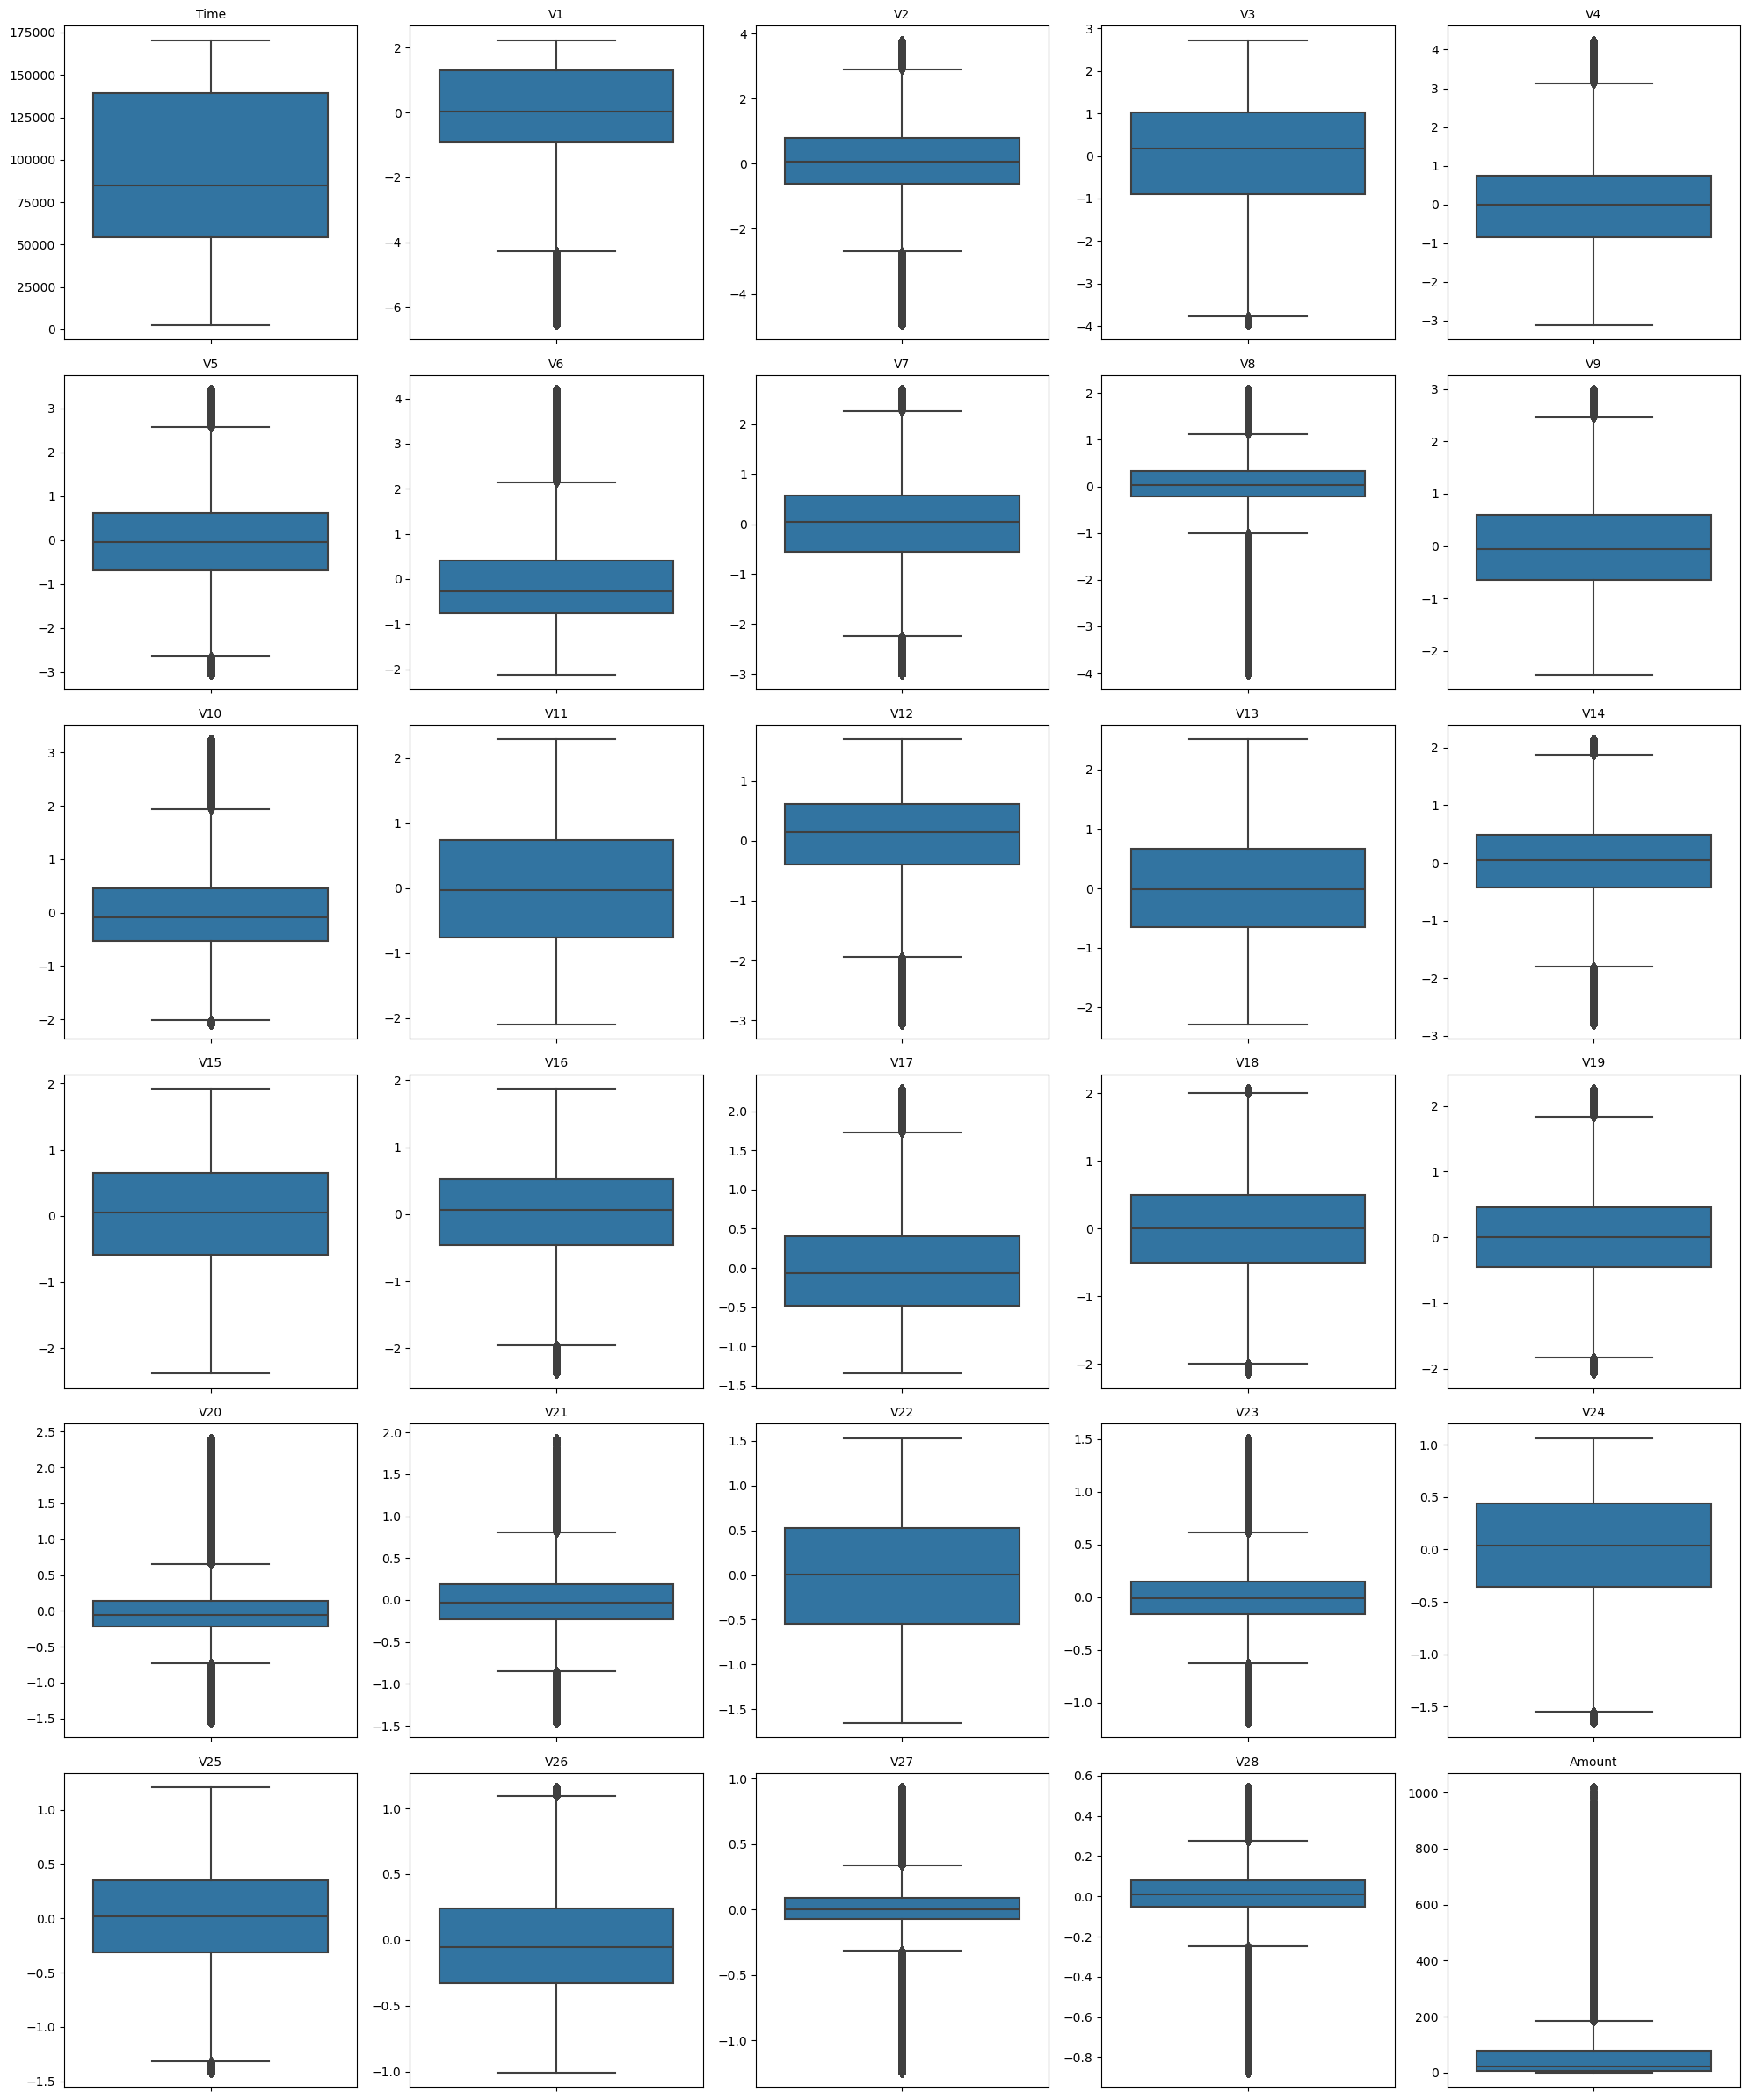

In [ ]:
# Winsorizing all numerical features
for column in data.columns[:-1]:
    data[column] = winsorize(data[column], limits=[0.01, 0.01])

# Calculate the number of rows and columns for the subplots
num_features = len(data.columns[:-1])  # Exclude 'Class'
num_cols = 5  # You can adjust this number based on your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Ensures enough rows to handle all features

# Set up the figure size
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

# Flatten the axis array.
ax = ax.flatten()

# Generate box plots for each winsorized feature
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

# Remove unused subplots if any
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

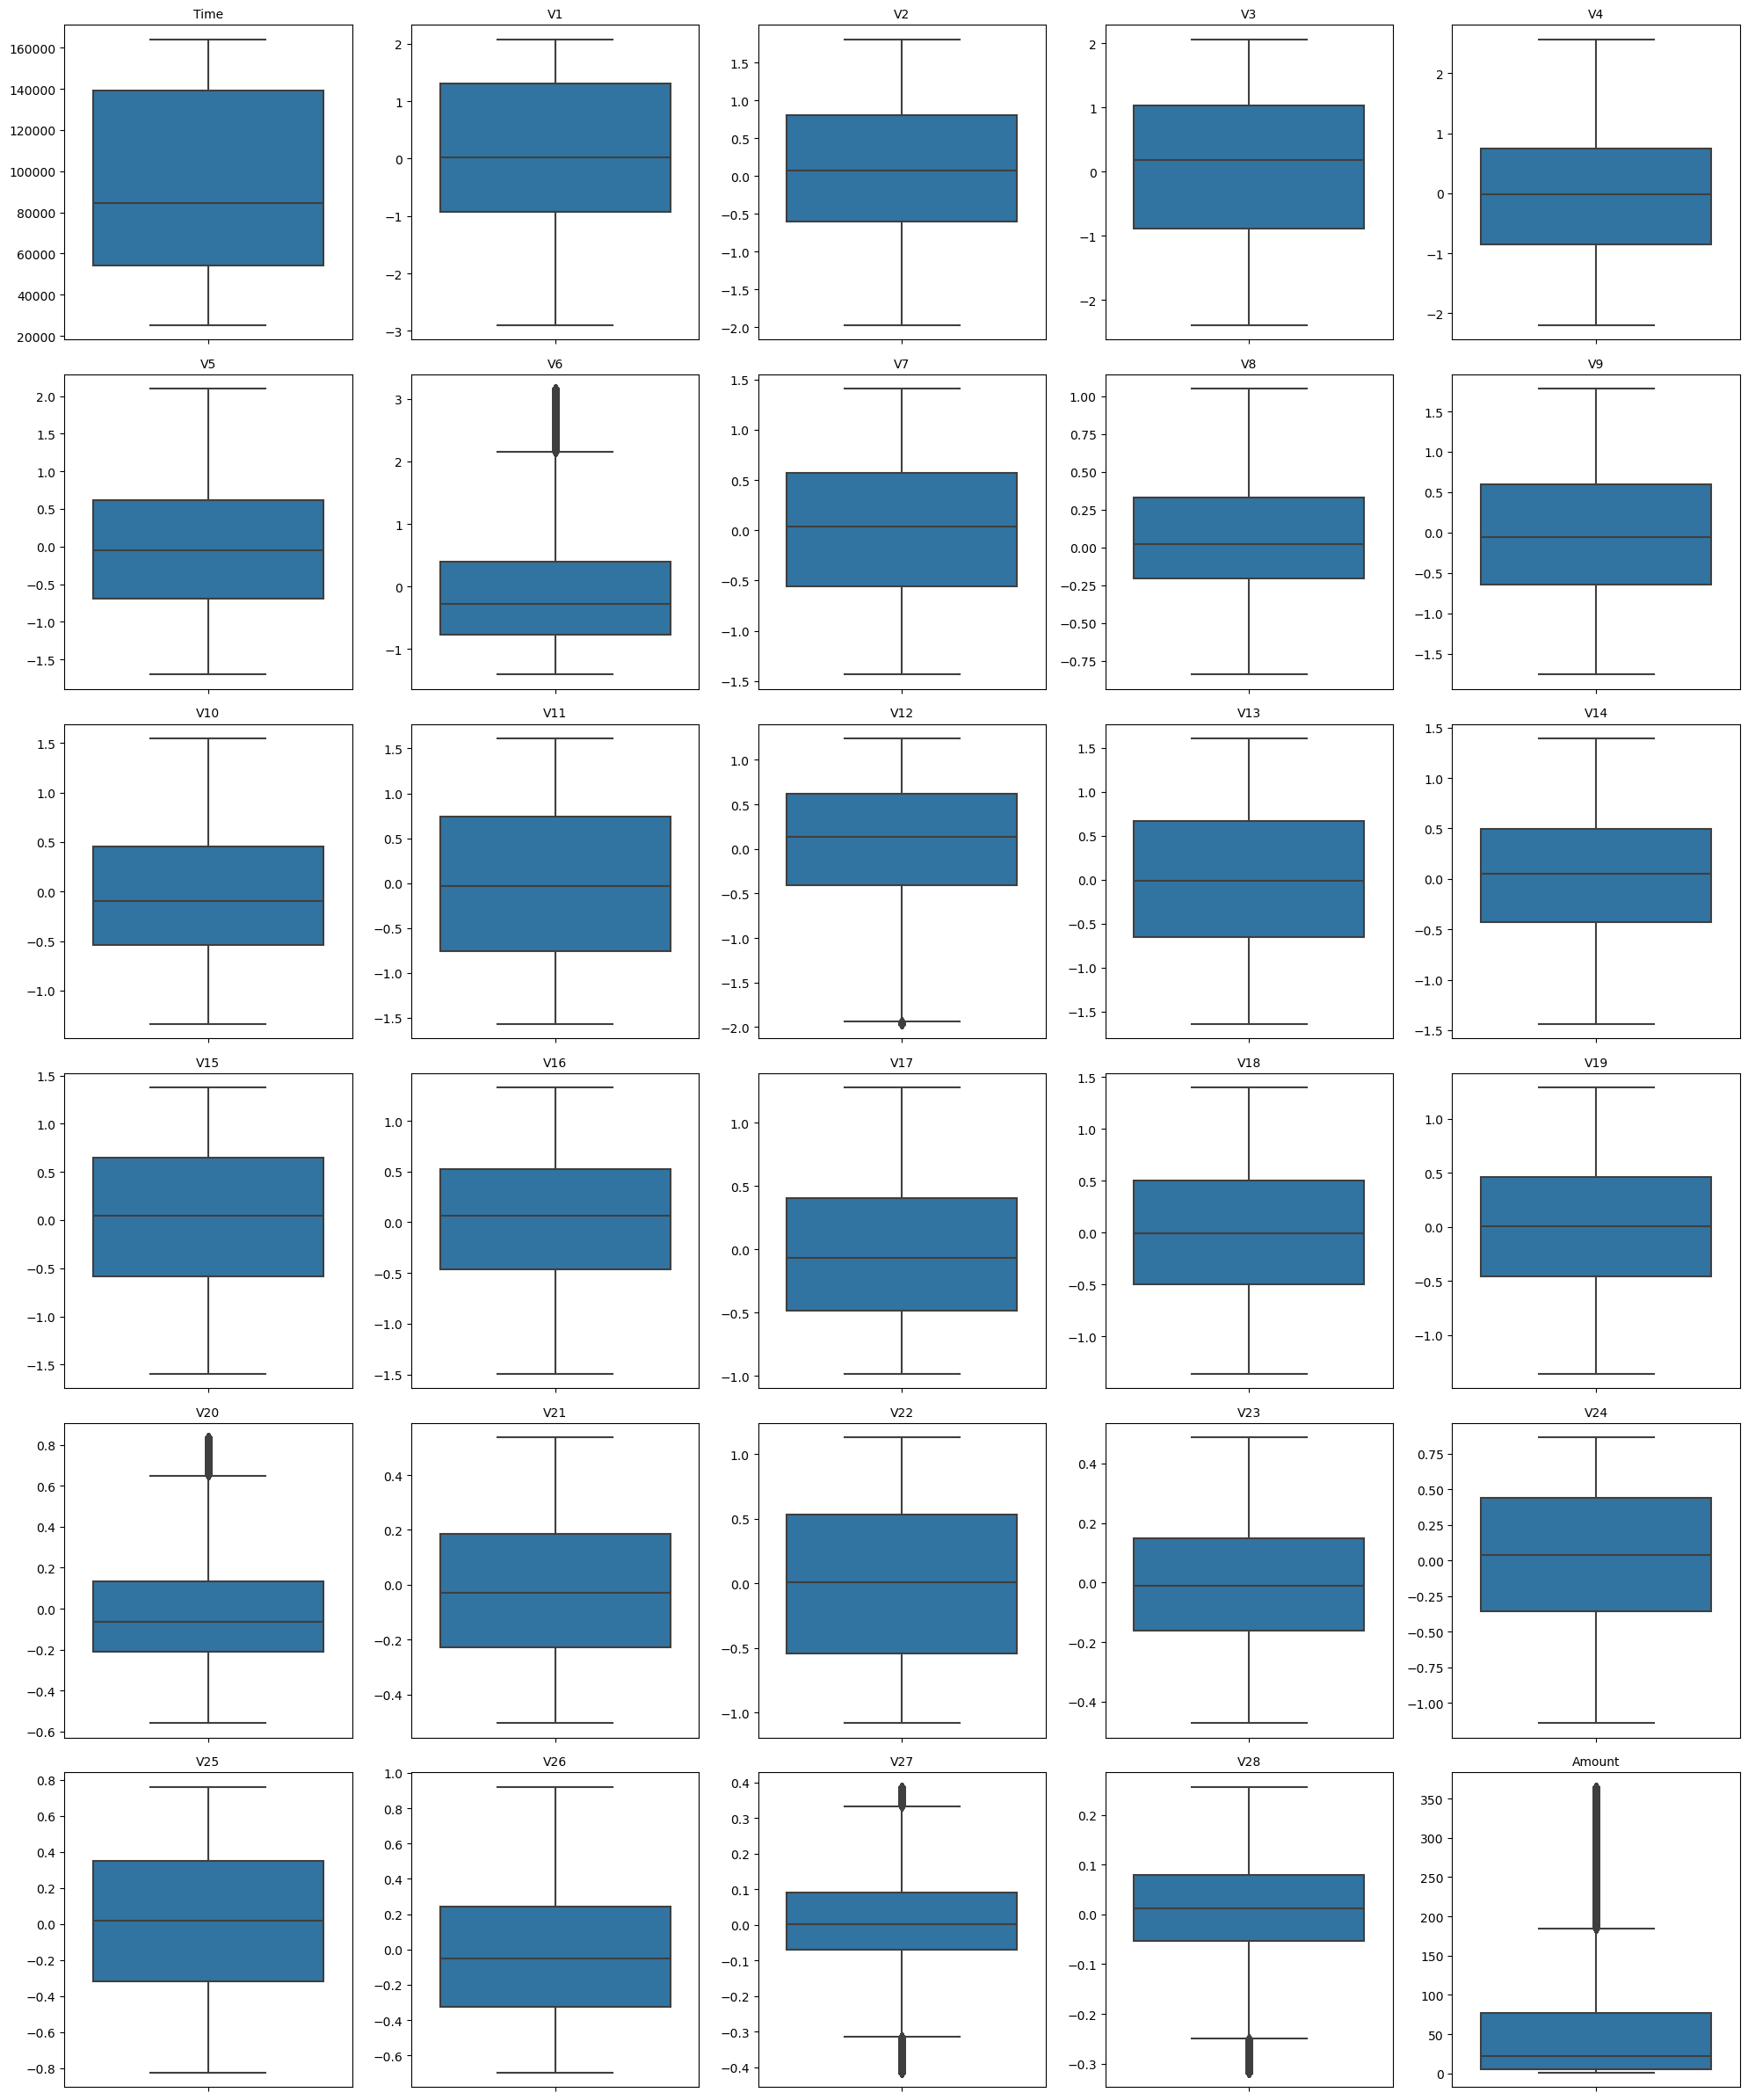

In [ ]:

# Applying more aggressive Winsorizing to each feature
for column in data.columns[:-1]:
    data[column] = winsorize(data[column], limits=[0.05, 0.05])  # Adjusting limits to 5%

# Plotting the box plots again to check the effect
num_features = len(data.columns[:-1])  # Exclude 'Class'
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols
fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
ax = ax.flatten()
for i, col in enumerate(data.columns[:-1]):
    sns.boxplot(y=data[col], ax=ax[i])
    ax[i].set_title(col, fontsize=10)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()


In [ ]:
print("Distribution in the full dataset:")
print(data['Class'].value_counts())

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nDistribution in the training set:")
print(y_train.value_counts())

print("\nDistribution in the testing set:")
print(y_test.value_counts())


Distribution in the full dataset:
Class
0    284315
1       492
Name: count, dtype: int64

Distribution in the training set:
Class
0    199020
1       344
Name: count, dtype: int64

Distribution in the testing set:
Class
0    85295
1      148
Name: count, dtype: int64


# Logistic Regression

In [ ]:
# Assuming 'data' is your DataFrame and 'Class' is the target column

# Splitting the data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features (optional as data has been winsorized, but typically recommended before modeling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Initializing Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Performing 5-fold cross-validation
f1_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='f1')
print("F1 Scores for each fold:", f1_scores)
print("Average F1 Score:", np.mean(f1_scores))

# Training the model on the full training data
log_reg.fit(X_train_scaled, y_train)

# Predicting the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


F1 Scores for each fold: [0.87218045 0.79069767 0.85271318 0.82706767 0.80916031]
Average F1 Score: 0.8303638556714883
Confusion Matrix:
 [[85270    25]
 [   39   109]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# Random Forest

In [ ]:

# Training Random Forest
rf = RandomForestClassifier()

# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='f1')
print("F1 Scores for each fold:", cv_scores)
print("Average F1 Score from CV:", np.mean(cv_scores))

# Fitting the model on the full training data for final evaluation
rf.fit(X_train_scaled, y_train)

# Making predictions on the test set
rf_pred = rf.predict(X_test_scaled)

# Evaluating the model
print("Random Forest Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


F1 Scores for each fold: [0.8976378  0.796875   0.86153846 0.859375   0.848     ]
Average F1 Score from CV: 0.8526852513628104
Random Forest Results:
Confusion Matrix:
 [[85289     6]
 [   38   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.95      0.74      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train with cross-validation
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='f1')
gb.fit(X_train_scaled, y_train)  # Training on full training data

# Prediction and evaluation
gb_pred = gb.predict(X_test_scaled)
print("Gradient Boosting CV F1 Scores:", gb_scores)
print("Average F1 Score:", np.mean(gb_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting CV F1 Scores: [0.74125874 0.68965517 0.75757576 0.02150538 0.78787879]
Average F1 Score: 0.5995747670942333
Confusion Matrix:
 [[85252    43]
 [   38   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.74      0.73       148

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443



# SVM

In [ ]:
from sklearn.svm import SVC

# Initialize and train with cross-validation
svm = SVC()
svm_scores = cross_val_score(svm, X_train_scaled, y_train, cv=5, scoring='f1')
svm.fit(X_train_scaled, y_train)  # Training on full training data

# Prediction and evaluation
svm_pred = svm.predict(X_test_scaled)
print("SVM CV F1 Scores:", svm_scores)
print("Average F1 Score:", np.mean(svm_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))


SVM CV F1 Scores: [0.87878788 0.75555556 0.85496183 0.83823529 0.79389313]
Average F1 Score: 0.8242867380586283
Confusion Matrix:
 [[85271    24]
 [   38   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.74      0.78       148

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train with cross-validation
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
knn.fit(X_train_scaled, y_train)  # Training on full training data

# Prediction and evaluation
knn_pred = knn.predict(X_test_scaled)
print("KNN CV F1 Scores:", knn_scores)
print("Average F1 Score:", np.mean(knn_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))


KNN CV F1 Scores: [0.88188976 0.72727273 0.84615385 0.82170543 0.79338843]
Average F1 Score: 0.8140820386629514
Confusion Matrix:
 [[85281    14]
 [   39   109]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.74      0.80       148

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initialize and train with cross-validation
nn = MLPClassifier(max_iter=300)
nn_scores = cross_val_score(nn, X_train_scaled, y_train, cv=5, scoring='f1')
nn.fit(X_train_scaled, y_train)  # Training on full training data

# Prediction and evaluation
nn_pred = nn.predict(X_test_scaled)
print("Neural Network CV F1 Scores:", nn_scores)
print("Average F1 Score:", np.mean(nn_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("Classification Report:\n", classification_report(y_test, nn_pred))


Neural Network CV F1 Scores: [0.875      0.76691729 0.79032258 0.83333333 0.76033058]
Average F1 Score: 0.8051807571447949
Confusion Matrix:
 [[85276    19]
 [   38   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.93      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train with cross-validation
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train_scaled, y_train, cv=5, scoring='f1')
nb.fit(X_train_scaled, y_train)


GaussianNB()

# raining Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train with cross-validation
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='f1')
dt.fit(X_train_scaled, y_train)  # Training on full training data

# Prediction and evaluation
dt_pred = dt.predict(X_test_scaled)
print("Decision Tree CV F1 Scores:", dt_scores)
print("Average F1 Score:", np.mean(dt_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree CV F1 Scores: [0.75912409 0.7114094  0.75555556 0.71428571 0.7480916 ]
Average F1 Score: 0.73769327129182
Confusion Matrix:
 [[85235    60]
 [   45   103]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.63      0.70      0.66       148

    accuracy                           1.00     85443
   macro avg       0.82      0.85      0.83     85443
weighted avg       1.00      1.00      1.00     85443



# Training Models Using Class Imbalance Smote

# Smote

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now let's check the new class distribution
print("New class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


New class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


<ipython-input-9-1790b6c6f549>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='hls')


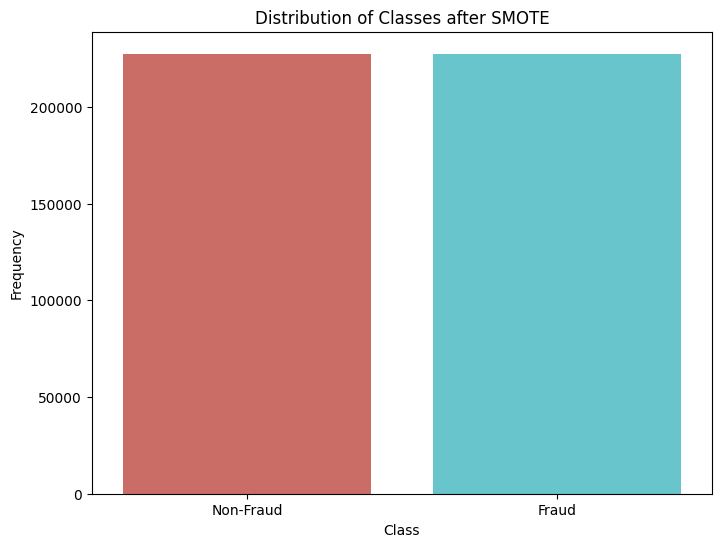

In [ ]:
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, palette='hls')
plt.title('Distribution of Classes after SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


In [6]:



# Scaling the data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Initializing Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Performing 5-fold cross-validation on the SMOTE data
f1_scores = cross_val_score(log_reg, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
print("F1 Scores for each fold:", f1_scores)
print("Average F1 Score:", np.mean(f1_scores))

# Training the model on the full training SMOTE data
log_reg.fit(X_train_smote_scaled, y_train_smote)

# Predicting the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


F1 Scores for each fold: [0.97017517 0.97047605 0.96961329 0.97102433 0.97046085]
Average F1 Score: 0.9703499362260393
Confusion Matrix:
 [[55913   951]
 [    7    91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.93      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.58     56962
weighted avg       1.00      0.98      0.99     56962



# Decision Tree

In [ ]:

# Initialize and train with cross-validation
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
dt.fit(X_train_smote_scaled, y_train_smote)  # Training on full training data

# Prediction and evaluation
dt_pred = dt.predict(X_test_scaled)
print("Decision Tree CV F1 Scores:", dt_scores)
print("Average F1 Score:", np.mean(dt_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))


Decision Tree CV F1 Scores: [0.99783514 0.99861624 0.99848412 0.99845176 0.99858281]
Average F1 Score: 0.99839401154458
Confusion Matrix:
 [[56765    99]
 [   26    72]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.73      0.54        98

    accuracy                           1.00     56962
   macro avg       0.71      0.87      0.77     56962
weighted avg       1.00      1.00      1.00     56962



# Random Forest

In [ ]:

rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
rf.fit(X_train_smote_scaled, y_train_smote)  # Training on full training data

# Prediction and evaluation
rf_pred = rf.predict(X_test_scaled)
print("Random Forest CV F1 Scores:", rf_scores)
print("Average F1 Score:", np.mean(rf_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest CV F1 Scores: [0.99970322 0.99996703 0.99992307 0.99995604 0.99993406]
Average F1 Score: 0.9998966801296924
Confusion Matrix:
 [[56857     7]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#  Gradient Boosting

In [ ]:


# Initialize and train with cross-validation
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
gb.fit(X_train_smote_scaled, y_train_smote)  # Training on full training data

# Prediction and evaluation
gb_pred = gb.predict(X_test_scaled)
print("Gradient Boosting CV F1 Scores:", gb_scores)
print("Average F1 Score:", np.mean(gb_scores))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))


Gradient Boosting CV F1 Scores: [0.98681428 0.9877158  0.98782917 0.98772178 0.98783956]
Average F1 Score: 0.9875841181159094
Confusion Matrix:
 [[56537   327]
 [   11    87]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.89      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.94      0.67     56962
weighted avg       1.00      0.99      1.00     56962



# SVM

In [ ]:



svm_model = SVC()

# Performing 5-fold cross-validation on the SMOTE data
svm_f1_scores = cross_val_score(svm_model, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
print("SVM F1 Scores for each fold:", svm_f1_scores)
print("Average F1 Score:", np.mean(svm_f1_scores))

# Training the model on the full training SMOTE data
svm_model.fit(X_train_smote_scaled, y_train_smote)

# Predicting the test set
svm_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM F1 Scores for each fold: [0.99635779 0.9968312  0.99652159 0.99643431 0.99624495]
Average F1 Score: 0.9964779667392556
SVM Confusion Matrix:
 [[56731   133]
 [   18    80]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.82      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.91      0.76     56962
weighted avg       1.00      1.00      1.00     56962



# KNN

In [ ]:


# Initializing KNN model
knn_model = KNeighborsClassifier()

# Performing 5-fold cross-validation on the SMOTE data
knn_f1_scores = cross_val_score(knn_model, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
print("KNN F1 Scores for each fold:", knn_f1_scores)
print("Average F1 Score:", np.mean(knn_f1_scores))

# Training the model on the full training SMOTE data
knn_model.fit(X_train_smote_scaled, y_train_smote)

# Predicting the test set
knn_pred = knn_model.predict(X_test_scaled)

# Evaluating the model
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:\n", classification_report(y_test, knn_pred))


KNN F1 Scores for each fold: [0.99912146 0.99907759 0.9991873  0.99908854 0.99907757]
Average F1 Score: 0.9991104921640759
KNN Confusion Matrix:
 [[56791    73]
 [   16    82]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.84      0.65        98

    accuracy                           1.00     56962
   macro avg       0.76      0.92      0.82     56962
weighted avg       1.00      1.00      1.00     56962



# Neural Network

In [ ]:

nn_model = MLPClassifier(max_iter=300)

# Performing 5-fold cross-validation on the SMOTE data
nn_f1_scores = cross_val_score(nn_model, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
print("Neural Network F1 Scores for each fold:", nn_f1_scores)
print("Average F1 Score:", np.mean(nn_f1_scores))

# Training the model on the full training SMOTE data
nn_model.fit(X_train_smote_scaled, y_train_smote)

# Predicting the test set
nn_pred = nn_model.predict(X_test_scaled)

# Evaluating the model
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, nn_pred))
print("Neural Network Classification Report:\n", classification_report(y_test, nn_pred))


Neural Network F1 Scores for each fold: [0.99980219 0.9997253  0.99946171 0.99920924 0.99981318]
Average F1 Score: 0.9996023246079739
Neural Network Confusion Matrix:
 [[56846    18]
 [   19    79]]
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# Naive Byes

In [ ]:


nb_model = GaussianNB()

# Performing 5-fold cross-validation on the SMOTE data
nb_f1_scores = cross_val_score(nb_model, X_train_smote_scaled, y_train_smote, cv=5, scoring='f1')
print("Naive Bayes F1 Scores for each fold:", nb_f1_scores)
print("Average F1 Score:", np.mean(nb_f1_scores))

# Training the model on the full training SMOTE data
nb_model.fit(X_train_smote_scaled, y_train_smote)

# Predicting the test set
nb_pred = nb_model.predict(X_test_scaled)

# Evaluating the model
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes F1 Scores for each fold: [0.91747562 0.91938577 0.9183968  0.91860168 0.91747087]
Average F1 Score: 0.9182661477999183
Naive Bayes Confusion Matrix:
 [[55565  1299]
 [   13    85]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



## HyperParameter Tuning

In [8]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
### LogisticRegression
# Define the parameter grid for LogisticRegression
from scipy.stats import randint as sp_randint
param_grid_LogisticRegression = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create the grid search object
grid_search_LogisticRegression = GridSearchCV(LogisticRegression(), param_grid_LogisticRegression, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search object to the data
grid_search_LogisticRegression.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_LogisticRegression = grid_search_LogisticRegression.best_params_

# Get the best score
best_score_LogisticRegression = grid_search_LogisticRegression.best_score_

# Get the best estimator
best_estimator_LogisticRegression = grid_search_LogisticRegression.best_estimator_

# Predict using the best estimator
y_pred_LogisticRegression = best_estimator_LogisticRegression.predict(X_test_scaled)

# Get the confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred_LogisticRegression)



Fitting 3 folds for each of 360 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [ ]:
# Print the results
print("Best parameters for LogisticRegression:", best_params_LogisticRegression)
print("Best score for LogisticRegression:", best_score_LogisticRegression)
print("Confusion Matrix for LogisticRegression:\n", cm_LogisticRegression)

In [17]:
###DecisionTreeClassifier
# Define the parameter grid for DecisionTreeClassifier
param_grid_DecisionTreeClassifier = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search_DecisionTreeClassifier = GridSearchCV(DecisionTreeClassifier(), param_grid_DecisionTreeClassifier, cv=3, scoring='accuracy')

# Fit the grid search object to the data
grid_search_DecisionTreeClassifier.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_DecisionTreeClassifier = grid_search_DecisionTreeClassifier.best_params_

# Get the best score
best_score_DecisionTreeClassifier = grid_search_DecisionTreeClassifier.best_score_

# Get the best estimator
best_estimator_DecisionTreeClassifier = grid_search_DecisionTreeClassifier.best_estimator_

# Predict using the best estimator
y_pred_DecisionTreeClassifier = best_estimator_DecisionTreeClassifier.predict(X_test_scaled)

# Get the confusion matrix
cm_DecisionTreeClassifier = confusion_matrix(y_test, y_pred_DecisionTreeClassifier)

# Print the results
print("Best parameters for DecisionTreeClassifier:", best_params_DecisionTreeClassifier)
print("Best score for DecisionTreeClassifier:", best_score_DecisionTreeClassifier)
print("Confusion Matrix for DecisionTreeClassifier:\n", cm_DecisionTreeClassifier)


Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score for DecisionTreeClassifier: 0.9985007759913124
Confusion Matrix for DecisionTreeClassifier:
 [[56765    99]
 [   20    78]]


In [22]:
###RandomForestClassifier
# Define the parameter grid for RandomForestClassifier
from scipy.stats import randint as sp_randint
param_grid_RandomForestClassifier = {
    'n_estimators': sp_randint(100,500),
    'max_depth': sp_randint(5, 50),
    'max_features': sp_randint(5, 30),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Create the grid search object, setting to all cores and 10 iterations, skip failed fits
grid_search_RandomForestClassifier = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_grid_RandomForestClassifier, cv=3, scoring='accuracy', n_jobs=-1, n_iter=10, verbose=1)

# Fit the grid search object to the data
grid_search_RandomForestClassifier.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_RandomForestClassifier = grid_search_RandomForestClassifier.best_params_

# Get the best score
best_score_RandomForestClassifier = grid_search_RandomForestClassifier.best_score_

# Get the best estimator
best_estimator_RandomForestClassifier = grid_search_RandomForestClassifier.best_estimator_

# Predict using the best estimator
y_pred_RandomForestClassifier = best_estimator_RandomForestClassifier.predict(X_test_scaled)

# Get the confusion matrix
cm_RandomForestClassifier = confusion_matrix(y_test, y_pred_RandomForestClassifier)

# Print the results
print("Best parameters for RandomForestClassifier:", best_params_RandomForestClassifier)
print("Best score for RandomForestClassifier:", best_score_RandomForestClassifier)
print("Confusion Matrix for RandomForestClassifier:\n", cm_RandomForestClassifier)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
### GradientBoostingClassifier
# Define the parameter grid for GradientBoostingClassifier
param_grid_GradientBoostingClassifier = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search_GradientBoostingClassifier = GridSearchCV(GradientBoostingClassifier(), param_grid_GradientBoostingClassifier, cv=3, scoring='accuracy')

# Fit the grid search object to the data
grid_search_GradientBoostingClassifier.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_GradientBoostingClassifier = grid_search_GradientBoostingClassifier.best_params_

# Get the best score
best_score_GradientBoostingClassifier = grid_search_GradientBoostingClassifier.best_score_

# Get the best estimator
best_estimator_GradientBoostingClassifier = grid_search_GradientBoostingClassifier.best_estimator_

# Predict using the best estimator
y_pred_GradientBoostingClassifier = best_estimator_GradientBoostingClassifier.predict(X_test_scaled)

# Get the confusion matrix
cm_GradientBoostingClassifier = confusion_matrix(y_test, y_pred_GradientBoostingClassifier)

# Print the results
print("Best parameters for GradientBoostingClassifier:", best_params_GradientBoostingClassifier)
print("Best score for GradientBoostingClassifier:", best_score_GradientBoostingClassifier)
print("Confusion Matrix for GradientBoostingClassifier:\n", cm_GradientBoostingClassifier)


In [15]:
### SVC
# Define the parameter grid for SVC
param_grid_SVC = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Create the grid search object
grid_search_SVC = GridSearchCV(SVC(), param_grid_SVC, cv=3, scoring='accuracy')

# Fit the grid search object to the data
grid_search_SVC.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_SVC = grid_search_SVC.best_params_

# Get the best score
best_score_SVC = grid_search_SVC.best_score_

# Get the best estimator
best_estimator_SVC = grid_search_SVC.best_estimator_

# Predict using the best estimator
y_pred_SVC = best_estimator_SVC.predict(X_test_scaled)

# Get the confusion matrix
cm_SVC = confusion_matrix(y_test, y_pred_SVC)

# Print the results
print("Best parameters for SVC:", best_params_SVC)
print("Best score for SVC:", best_score_SVC)
print("Confusion Matrix for SVC:\n", cm_SVC)


Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9988876725096834
Confusion Matrix for SVC:
 [[56773    91]
 [   22    76]]


In [8]:
### KNeighborsClassifier
# Define the parameter grid for KNeighborsClassifier
param_grid_KNeighborsClassifier = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the grid search object
grid_search_KNeighborsClassifier = GridSearchCV(KNeighborsClassifier(), param_grid_KNeighborsClassifier, cv=3, scoring='accuracy')

# Fit the grid search object to the data

grid_search_KNeighborsClassifier.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_KNeighborsClassifier = grid_search_KNeighborsClassifier.best_params_

# Get the best score

best_score_KNeighborsClassifier = grid_search_KNeighborsClassifier.best_score_

# Get the best estimator
best_estimator_KNeighborsClassifier = grid_search_KNeighborsClassifier.best_estimator_

# Predict using the best estimator
y_pred_KNeighborsClassifier = best_estimator_KNeighborsClassifier.predict(X_test_scaled)

# Get the confusion matrix
cm_KNeighborsClassifier = confusion_matrix(y_test, y_pred_KNeighborsClassifier)

# Print the results
print("Best parameters for KNeighborsClassifier:", best_params_KNeighborsClassifier)
print("Best score for KNeighborsClassifier:", best_score_KNeighborsClassifier)
print("Confusion Matrix for KNeighborsClassifier:\n", cm_KNeighborsClassifier)


Best parameters for KNeighborsClassifier: {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
Best score for KNeighborsClassifier: 0.9993141379901606
Confusion Matrix for KNeighborsClassifier:
 [[56816    48]
 [   19    79]]


In [9]:
### MLPClassifier
# Define the parameter grid for MLPClassifier
param_grid_MLPClassifier = {
    'hidden_layer_sizes': [(100,), (200,), (300,)],
    'activation': ['identity'
                    , 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}

# Create the grid search object
grid_search_MLPClassifier = GridSearchCV(MLPClassifier(max_iter=300), param_grid_MLPClassifier, cv=3, scoring='accuracy')

# Fit the grid search object to the data
grid_search_MLPClassifier.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_MLPClassifier = grid_search_MLPClassifier.best_params_

# Get the best score
best_score_MLPClassifier = grid_search_MLPClassifier.best_score_

# Get the best estimator
best_estimator_MLPClassifier = grid_search_MLPClassifier.best_estimator_

# Predict using the best estimator
y_pred_MLPClassifier = best_estimator_MLPClassifier.predict(X_test_scaled)

# Get the confusion matrix
cm_MLPClassifier = confusion_matrix(y_test, y_pred_MLPClassifier)

# Print the results
print("Best parameters for MLPClassifier:", best_params_MLPClassifier)
print("Best score for MLPClassifier:", best_score_MLPClassifier)
print("Confusion Matrix for MLPClassifier:\n", cm_MLPClassifier)


KeyboardInterrupt: 

In [7]:
### GaussianNB
# Define the parameter grid for GaussianNB
param_grid_GaussianNB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create the grid search object
grid_search_GaussianNB = GridSearchCV(GaussianNB(), param_grid_GaussianNB, cv=3, scoring='accuracy')

# Fit the grid search object to the data
grid_search_GaussianNB.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters
best_params_GaussianNB = grid_search_GaussianNB.best_params_

# Get the best score
best_score_GaussianNB = grid_search_GaussianNB.best_score_

# Get the best estimator
best_estimator_GaussianNB = grid_search_GaussianNB.best_estimator_

# Predict using the best estimator
y_pred_GaussianNB = best_estimator_GaussianNB.predict(X_test_scaled)

# Get the confusion matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)

# Print the results
print("Best parameters for GaussianNB:", best_params_GaussianNB)
print("Best score for GaussianNB:", best_score_GaussianNB)
print("Confusion Matrix for GaussianNB:\n", cm_GaussianNB)


Best parameters for GaussianNB: {'var_smoothing': 1e-09}
Best score for GaussianNB: 0.9227547911418283
Confusion Matrix for GaussianNB:
 [[55565  1299]
 [   13    85]]


Bonus:
# Feature extraction
>  filter methods, wrapper methods, and embedded methods
# explainable AI models
> LIME, SHAP, ELI5

In [ ]:
!pip install -q mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Define the dataset and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Initialize the sequential feature selector
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000),
                                k_features=5,
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='f1',
                                cv=5)

# Fit the selector to the data
sfs.fit(X, y)


[2024-05-16 18:09:05] Features: 1/5 -- score: 0.5742275219099068
[2024-05-16 18:09:43] Features: 2/5 -- score: 0.6600270023913696
[2024-05-16 18:10:10] Features: 3/5 -- score: 0.6871217899995331
[2024-05-16 18:10:40] Features: 4/5 -- score: 0.6947350175197772
[2024-05-16 18:11:12] Features: 5/5 -- score: 0.7053805254347095

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                          k_features=(5, 5), scoring='f1', verbose=2)

In [ ]:
# this is due to warnings creating a clutter
# Print the selected features
print('Selected features:', sfs.k_feature_idx_)


Selected features: (8, 10, 12, 14, 16)


In [ ]:
# (https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models)

# LIME
!pip install -q lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=X_train_smote_scaled,
    feature_names=X_train.columns,
    class_names=['Non-Fraud', 'Fraud'],
    discretize_continuous=True
)

# Explain a single prediction
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_smote_scaled, y_train_smote)
idx = 1000
exp = explainer.explain_instance(X_test_scaled[idx], log_reg.predict_proba)

exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.5 MB/s eta 0:00:00


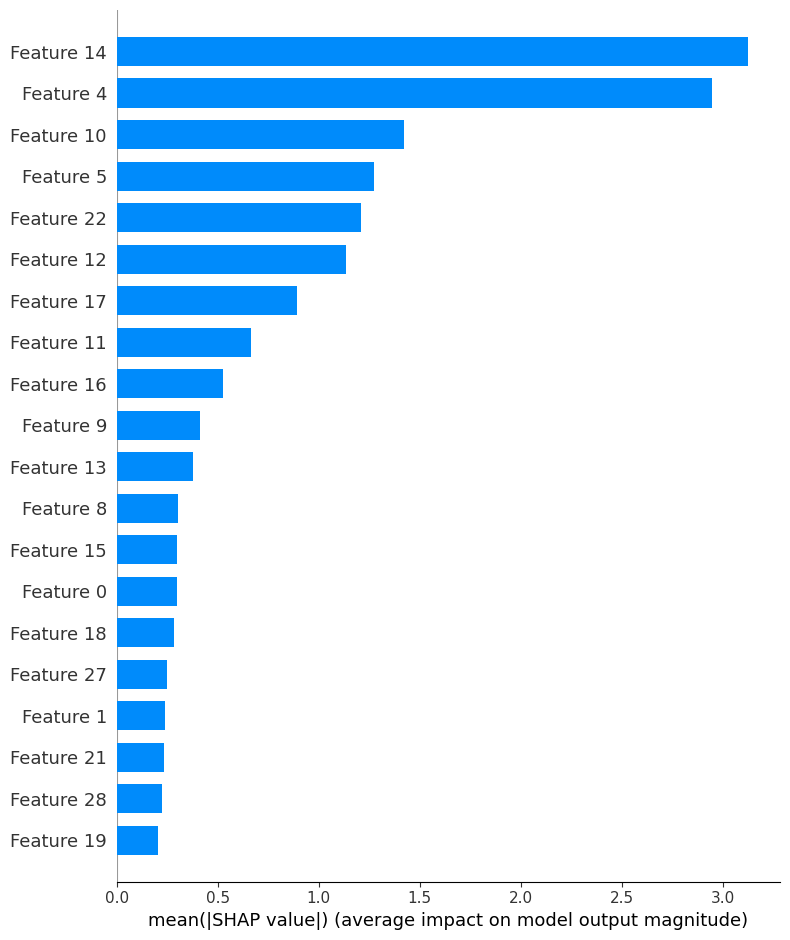

In [ ]:
# SHAP
!pip install -q shap
import shap

# load JS visualization code to notebook
shap.initjs()
# limit to idx = 1000
shap_sample = X_test_scaled[idx].reshape(1, -1)
explainer = shap.Explainer(log_reg, X_train_smote_scaled)
shap_values = explainer(shap_sample)

shap.summary_plot(shap_values, X_test_scaled, plot_type='bar')

In [ ]:
# ELI5
!pip install -q eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(log_reg, random_state=1).fit(X_train_smote_scaled, y_train_smote)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())